In [1]:
import sys
import os
from pathlib import Path

sys.path.append(Path.cwd().parent.joinpath("source").as_posix())

from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
import mvalab
import utils
import random
random.seed(1)

## Functions

In [2]:
def plot_sar(ima):
    plt.figure(figsize=(12,12))
    t = np.mean(ima)+3*np.std(ima)
    plt.imshow(np.clip(ima,0,t),cmap='gray')
    plt.show()

In [3]:
def read_tiff(chemin):
    dataset = gdal.Open(chemin)
    for x in range(1, dataset.RasterCount + 1):
        band = dataset.GetRasterBand(x)
        array = band.ReadAsArray()
    return array.astype(np.float64)

## Download Sentinel 1 images

We need to download GRT images of the area represented by the following coordinates:
- lonmin = -76.7
- lonmax = -75.8
- latmin = -6.4
- latmax = -5.8

In between the dates:
- 2014-10-22
- 2017-09-21


You can specify a writing directory with `--write_dir`.

In [5]:
# for smaller box:
storage = "/mnt/SAR_images"


!mkdir $storage/s1_images
# !python ../source/peps_download.py -w $storage/s1_images -c S1 -p GRD -x True -m IW --polarisation VV --processing LEVEL1  --orbit_direction ascending --lonmin -76.5039 --lonmax -75.8434 --latmin -6.19858 --latmax -5.7956 -a ../peps.txt -d 2014-10-22 -f 2014-12-22
!python ../source/peps_download.py -w $storage/s1_images/descending -c S1 -p GRD -x True -m IW --polarisation VV+VH --processing LEVEL1  --orbit_direction descending --lonmin -76.81 --lonmax -75 --latmin -6.34 --latmax -5.40 -a ../peps.txt -d 2016-10-22 -f 2019-09-21

# for larger box:
#!python ../source/peps_download.py -w $storage -c S1 -p GRD -x True -m IW --polarisation VV --processing LEVEL1  --orbit_direction ascending --lonmin -76.6001 --lonmax -75.8557 --latmin -6.3023 --latmax -5.8025 -a ../peps.txt -d 2014-10-22 -f 2017-09-21

mkdir: cannot create directory ‘/mnt/SAR_images/s1_images’: File exists
curl -k -o search.json https://peps.cnes.fr/resto/api/collections/S1/search.json?box=-76.81,-6.34,-75.0,-5.4\&startDate=2016-10-22\&completionDate=2019-09-21\&maxRecords=500\&productType=GRD\&sensorMode=IW\&polarisation=VV+VH\&processingLevel=LEVEL1\&orbitDirection=descending
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1636k    0 1636k    0     0  1010k      0 --:--:--  0:00:01 --:--:-- 1010k
S1B_IW_GRDH_1SDV_20190920T104523_20190920T104548_018120_0221EE_5E87 tape
S1B_IW_GRDH_1SDV_20190920T104458_20190920T104523_018120_0221EE_427A tape
S1B_IW_GRDH_1SDV_20190915T103710_20190915T103735_018047_021F98_FE7A tape
S1B_IW_GRDH_1SDV_20190915T103645_20190915T103710_018047_021F98_DE3A tape
S1B_IW_GRDH_1SDV_20190908T104522_20190908T104547_017945_021C7E_7A53 tape
S1B_IW_GRDH_1SDV_20190908T104457_20190908T104522_

In [5]:
import os
import shutil
s1_images = os.path.join(storage,"s1_images")
for dir in os.listdir(s1_images):
    if dir[-5:] == ".SAFE":
        os.mkdir(os.path.join(s1_images, dir[:-5]))
        shutil.move(os.path.join(s1_images, dir), os.path.join(s1_images, dir[:-5]))

FileNotFoundError: [Errno 2] No such file or directory: '/home/soudini/storage/SAR_images/s1_images'

## Check data

Check that we have 64 SAR images for the ascending orbit.

In [ ]:
workdir = os.path.join(storage, 's1_images')
images_path = utils.get_all_images_filepaths(workdir)

Number of folders downloaded:  0
Number of images downloaded:  0


## Visualise random SAR images

In [ ]:
n = 3
random_imagepath = random.sample(images_path, n)

ValueError: Sample larger than population or is negative

s1b-iw-grd-vv-20170512t232614-20170512t232639-005571-009c23-001.tiff


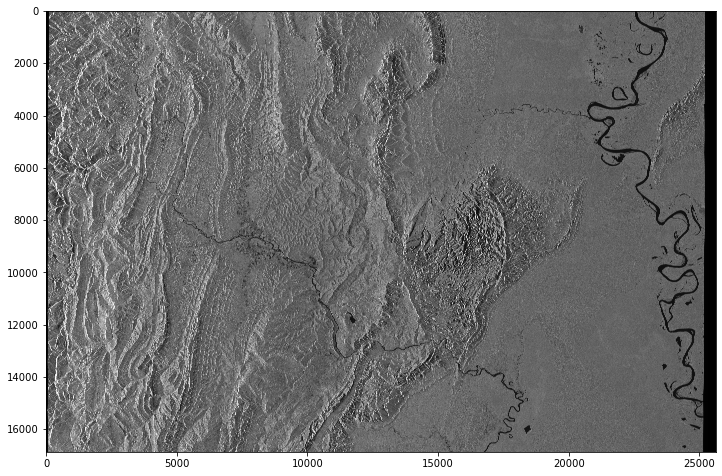

In [ ]:
i = 0
image = read_tiff(random_imagepath[i])
print(random_imagepath[i].split("/")[-1])
plot_sar(image)

s1a-iw-grd-vv-20151020t232658-20151020t232723-008242-00b9b8-001.tiff


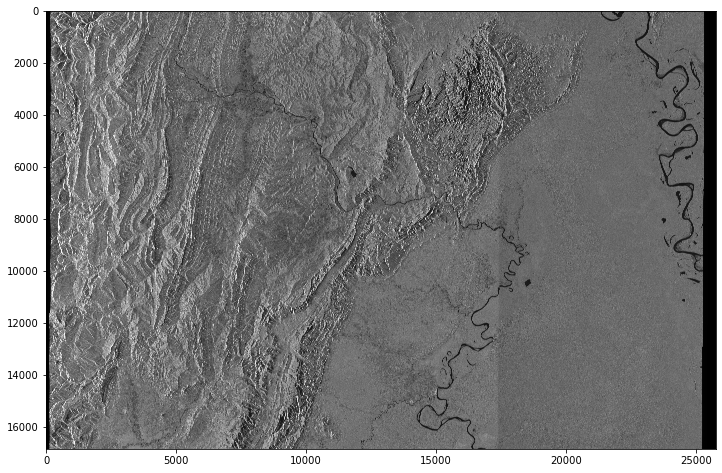

In [ ]:
i = 1
image = read_tiff(random_imagepath[i])
print(random_imagepath[i].split("/")[-1])
plot_sar(image)

s1a-iw-grd-vv-20150318t232644-20150318t232709-005092-006673-001.tiff


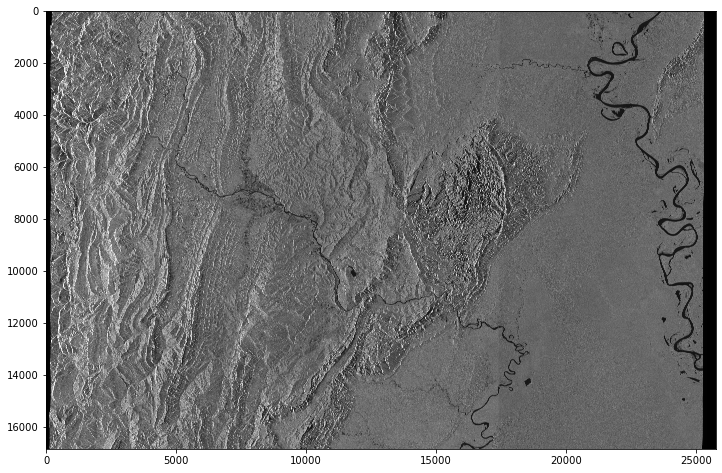

In [ ]:
i = 2
image = read_tiff(random_imagepath[i])
print(random_imagepath[i].split("/")[-1])
plot_sar(image)

/home/soudini/storage/SAR_images/processed/18MUU/s1b_18MUU_vv_ASC_120_20161020txxxxxx.tif


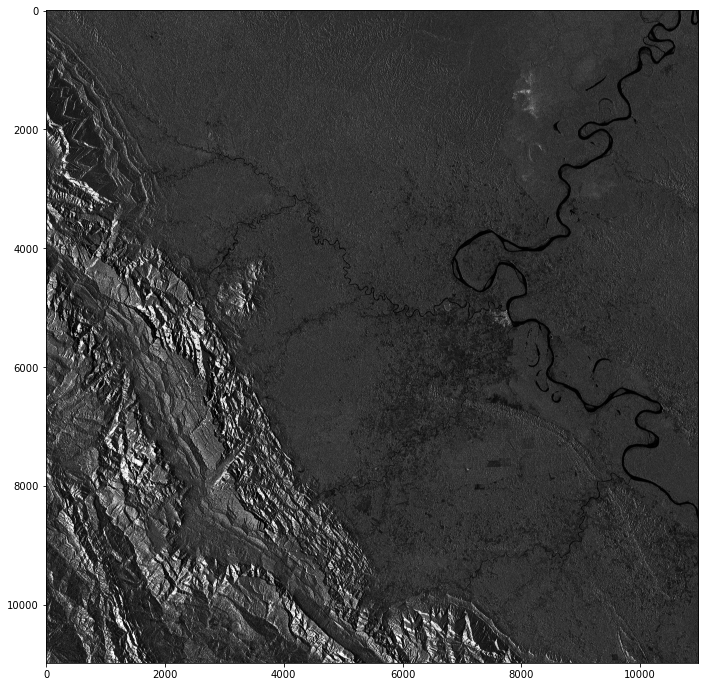

/home/soudini/storage/SAR_images/processed/18MVU/s1b_18MVU_vv_ASC_120_20170418txxxxxx.tif


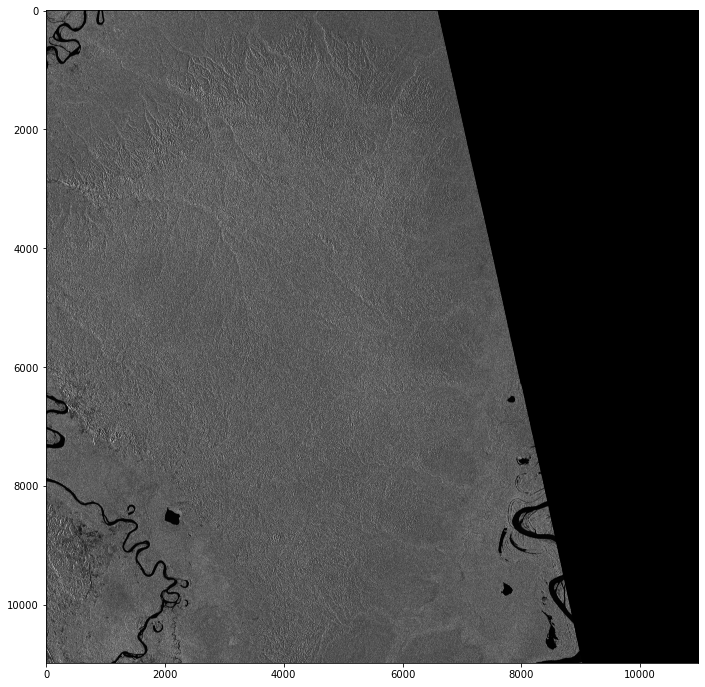

In [ ]:
storage = "/home/soudini/storage/SAR_images/"

processed = os.path.join(storage,'processed')
for dir in os.listdir(processed):
    dir_path = os.path.join(processed, dir)
    im_path = os.path.join( dir_path, random.choice(os.listdir(dir_path)))
    print(im_path)
    image = read_tiff(im_path)
    plot_sar(image)